***Midterm Project***

In [447]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
import pandas as pd

# Load the dataset
file_path = '/Users/admin/captone/risk-train.txt'
data = pd.read_csv(file_path, sep='\t')  # Change sep if necessary (e.g., ',', ' ' for space)


In [448]:
data.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,no,yes,no,1/17/1973,yes,yes,check,?,5.2006,...,no,no,no,8,yes,0,0.00,?,?,?
1,49919,no,yes,yes,12/8/1970,no,no,credit_card,Visa,12.2007,...,yes,no,no,13,yes,0,0.00,?,?,?
2,49923,no,yes,no,4/3/1972,yes,no,check,?,12.2007,...,no,no,no,3,yes,0,0.00,?,?,?
3,49924,no,no,yes,8/1/1966,yes,no,check,?,1.2007,...,no,no,no,11,no,4,75.72,5/12/2002,0,0
4,49927,no,yes,yes,12/21/1969,yes,no,credit_card,Eurocard,12.2006,...,no,no,no,16,yes,0,0.00,?,?,?


In [449]:
data.dtypes

ORDER_ID               int64
CLASS                 object
B_EMAIL               object
B_TELEFON             object
B_BIRTHDATE           object
FLAG_LRIDENTISCH      object
FLAG_NEWSLETTER       object
Z_METHODE             object
Z_CARD_ART            object
Z_CARD_VALID         float64
Z_LAST_NAME           object
VALUE_ORDER          float64
WEEKDAY_ORDER         object
TIME_ORDER            object
AMOUNT_ORDER           int64
ANUMMER_01             int64
ANUMMER_02            object
ANUMMER_03            object
ANUMMER_04            object
ANUMMER_05            object
ANUMMER_06            object
ANUMMER_07            object
ANUMMER_08            object
ANUMMER_09            object
ANUMMER_10            object
CHK_LADR              object
CHK_RADR              object
CHK_KTO               object
CHK_CARD              object
CHK_COOKIE            object
CHK_IP                object
FAIL_LPLZ             object
FAIL_LORT             object
FAIL_LPLZORTMATCH     object
FAIL_RPLZ     

#time order

In [450]:
data["TIME_ORDER"] = pd.to_datetime(data["TIME_ORDER"] , format='%H:%M', errors='coerce')
data["TIME_ORDER"]
print(data.dtypes)

ORDER_ID                      int64
CLASS                        object
B_EMAIL                      object
B_TELEFON                    object
B_BIRTHDATE                  object
FLAG_LRIDENTISCH             object
FLAG_NEWSLETTER              object
Z_METHODE                    object
Z_CARD_ART                   object
Z_CARD_VALID                float64
Z_LAST_NAME                  object
VALUE_ORDER                 float64
WEEKDAY_ORDER                object
TIME_ORDER           datetime64[ns]
AMOUNT_ORDER                  int64
ANUMMER_01                    int64
ANUMMER_02                   object
ANUMMER_03                   object
ANUMMER_04                   object
ANUMMER_05                   object
ANUMMER_06                   object
ANUMMER_07                   object
ANUMMER_08                   object
ANUMMER_09                   object
ANUMMER_10                   object
CHK_LADR                     object
CHK_RADR                     object
CHK_KTO                     

#Z_CARD_ART

In [451]:

df_encoded = pd.get_dummies(data["Z_CARD_ART"], prefix='new', drop_first=True)


df_encoded

,new_Amex,new_Eurocard,new_Visa,new_debit_card
0,False,False,False,False
1,False,False,True,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
29995,False,False,False,False
29996,False,True,False,False
29997,False,True,False,False
29998,False,False,True,False


#Z_CARD_VALID

In [452]:
data["Z_CARD_VALID"] = data["Z_CARD_VALID"].astype(str)

In [453]:


# Replace '.' with '-' in the 'Date' column
data["Z_CARD_VALID"]= data["Z_CARD_VALID"].str.replace('.', '-', regex=False)



# Convert the 'Date' column to datetime format
data["Z_CARD_VALID"]= pd.to_datetime(data["Z_CARD_VALID"], format='%m-%Y', errors='coerce')

print(data)



       ORDER_ID CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH  \
0         49917    no     yes        no   1/17/1973              yes   
1         49919    no     yes       yes   12/8/1970               no   
2         49923    no     yes        no    4/3/1972              yes   
3         49924    no      no       yes    8/1/1966              yes   
4         49927    no     yes       yes  12/21/1969              yes   
...         ...   ...     ...       ...         ...              ...   
29995     49821    no     yes        no    3/3/1981              yes   
29996     49824    no     yes        no   2/21/1972               no   
29997     49825    no     yes        no   6/11/1980               no   
29998     49828    no     yes        no   12/4/1980               no   
29999     49829    no     yes        no   3/15/1958               no   

      FLAG_NEWSLETTER    Z_METHODE Z_CARD_ART Z_CARD_VALID  ... FAIL_RPLZ  \
0                 yes        check          ?   2006-05-01

#Z_METHOD

In [454]:

df_encoded_1 = pd.get_dummies(data["Z_METHODE"], prefix='new', drop_first=False)
df_encoded_1.tail()


,new_check,new_credit_card,new_debit_card,new_debit_note
29995,True,False,False,False
29996,False,True,False,False
29997,False,True,False,False
29998,False,True,False,False
29999,False,True,False,False


#
["MAHN_HOECHST"]
["MAHN_AKT"]

In [455]:
import pandas as pd

# Sample DataFrame with multiple categorical columns
df = data[["MAHN_HOECHST","MAHN_AKT"]]

# Apply One-Hot Encoding to multiple columns
df_encoded = pd.get_dummies(df, columns=["MAHN_HOECHST","MAHN_AKT"], drop_first=False)


df_encoded=df_encoded.drop(df_encoded[["MAHN_HOECHST_?","MAHN_AKT_?"]],axis=1)




In [456]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data["WEEKDAY_ORDER"] = label_encoder.fit_transform(data["WEEKDAY_ORDER"])


#Z_CARD_VALID

In [457]:
data["Z_CARD_VALID"] = data["Z_CARD_VALID"].astype(str)
data["Z_CARD_VALID"] = pd.to_datetime(data["Z_CARD_VALID"])

print(data)


       ORDER_ID CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH  \
0         49917    no     yes        no   1/17/1973              yes   
1         49919    no     yes       yes   12/8/1970               no   
2         49923    no     yes        no    4/3/1972              yes   
3         49924    no      no       yes    8/1/1966              yes   
4         49927    no     yes       yes  12/21/1969              yes   
...         ...   ...     ...       ...         ...              ...   
29995     49821    no     yes        no    3/3/1981              yes   
29996     49824    no     yes        no   2/21/1972               no   
29997     49825    no     yes        no   6/11/1980               no   
29998     49828    no     yes        no   12/4/1980               no   
29999     49829    no     yes        no   3/15/1958               no   

      FLAG_NEWSLETTER    Z_METHODE Z_CARD_ART Z_CARD_VALID  ... FAIL_RPLZ  \
0                 yes        check          ?   2006-05-01

In [458]:
from sklearn.preprocessing import LabelEncoder

data.replace('?', pd.NA, inplace=True) 
label_encoder = LabelEncoder()
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])
data['B_EMAIL'] = label_encoder.fit_transform(data['B_EMAIL'])
data['B_TELEFON'] = label_encoder.fit_transform(data['B_TELEFON'])
data["B_BIRTHDATE"] = pd.to_datetime(data["B_BIRTHDATE"])
data["DATE_LORDER"] = pd.to_datetime(data["DATE_LORDER"])
data["TIME_ORDER"] = pd.to_datetime(data["TIME_ORDER"] , format='%H:%M', errors='coerce')
data['FLAG_LRIDENTISCH'] = label_encoder.fit_transform(data['FLAG_LRIDENTISCH'])
data['FLAG_NEWSLETTER'] = label_encoder.fit_transform(data['FLAG_NEWSLETTER'])
data['FAIL_RPLZ'] = label_encoder.fit_transform(data['FAIL_RPLZ'])
data['FAIL_RPLZORTMATCH'] = label_encoder.fit_transform(data['FAIL_RPLZORTMATCH'])
data['FAIL_RORT'] = label_encoder.fit_transform(data['FAIL_RORT'])
data['NEUKUNDE'] = label_encoder.fit_transform(data['NEUKUNDE'])
data['CHK_LADR'] = label_encoder.fit_transform(data['CHK_LADR'])
data["Z_LAST_NAME"]  = data["Z_LAST_NAME"].astype(str)
data['Z_LAST_NAME'] = label_encoder.fit_transform(data['Z_LAST_NAME'])
# data["Z_CARD_VALID"] = data["Z_CARD_VALID"].astype(str)
# data["Z_CARD_VALID"] = pd.to_datetime(data["Z_CARD_VALID"])
# data['Z_METHODE'] = label_encoder.fit_transform(data['Z_METHODE'])

# data["Z_CARD_ART"]  = data["Z_CARD_ART"].astype(str)
# data['Z_CARD_ART'] = label_encoder.fit_transform(data['Z_CARD_ART'])

data['CHK_RADR'] = label_encoder.fit_transform(data['CHK_RADR'])
data['CHK_KTO'] = label_encoder.fit_transform(data['CHK_KTO'])
data['CHK_CARD'] = label_encoder.fit_transform(data['CHK_CARD'])
data['CHK_COOKIE'] = label_encoder.fit_transform(data['CHK_COOKIE'])
data['CHK_IP'] = label_encoder.fit_transform(data['CHK_IP'])
data['FAIL_LPLZ'] = label_encoder.fit_transform(data['FAIL_LPLZ'])
data['FAIL_LORT'] = label_encoder.fit_transform(data['FAIL_LORT'])
data['FAIL_LPLZORTMATCH'] = label_encoder.fit_transform(data['FAIL_LPLZORTMATCH'])
data.head(11)



,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,0,1,0,1973-01-17,1,1,check,<NA>,2006-05-01,...,0,0,0,8,1,0,0.00,NaT,<NA>,<NA>
1,49919,0,1,1,1970-12-08,0,0,credit_card,Visa,2007-12-01,...,1,0,0,13,1,0,0.00,NaT,<NA>,<NA>
2,49923,0,1,0,1972-04-03,1,0,check,<NA>,2007-12-01,...,0,0,0,3,1,0,0.00,NaT,<NA>,<NA>
3,49924,0,0,1,1966-08-01,1,0,check,<NA>,2007-01-01,...,0,0,0,11,0,4,75.72,2002-05-12,0,0
4,49927,0,1,1,1969-12-21,1,0,credit_card,Eurocard,2006-12-01,...,0,0,0,16,1,0,0.00,NaT,<NA>,<NA>
5,49928,0,0,0,1975-01-20,0,0,credit_card,Eurocard,2007-02-01,...,0,0,0,8,0,1,6.95,2003-12-28,0,0
6,49929,0,1,0,1978-02-03,1,0,check,<NA>,2007-11-01,...,0,0,0,13,0,2,10.44,2004-07-18,0,1
7,49930,0,0,0,1985-07-21,1,0,check,<NA>,2005-05-01,...,0,0,0,7,1,0,0.00,NaT,<NA>,<NA>
8,49931,0,1,0,1953-05-21,0,0,credit_card,Visa,2007-09-01,...,0,0,0,9,0,1,6.10,2003-06-05,1,1
9,49933,1,0,0,1978-10-02,1,0,check,<NA>,2006-11-01,...,0,0,0,1,1,0,0.00,NaT,<NA>,<NA>


In [459]:
data.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,0,1,0,1973-01-17,1,1,check,<NA>,2006-05-01,...,0,0,0,8,1,0,0.00,NaT,<NA>,<NA>
1,49919,0,1,1,1970-12-08,0,0,credit_card,Visa,2007-12-01,...,1,0,0,13,1,0,0.00,NaT,<NA>,<NA>
2,49923,0,1,0,1972-04-03,1,0,check,<NA>,2007-12-01,...,0,0,0,3,1,0,0.00,NaT,<NA>,<NA>
3,49924,0,0,1,1966-08-01,1,0,check,<NA>,2007-01-01,...,0,0,0,11,0,4,75.72,2002-05-12,0,0
4,49927,0,1,1,1969-12-21,1,0,credit_card,Eurocard,2006-12-01,...,0,0,0,16,1,0,0.00,NaT,<NA>,<NA>


In [460]:
data = data.drop(columns=['ANUMMER_03',"ANUMMER_02",'ANUMMER_04',"ANUMMER_05","ANUMMER_06",
                               "ANUMMER_07","ANUMMER_08","ANUMMER_09","ANUMMER_10"])


In [461]:
print(data.dtypes)
print(data.head())

ORDER_ID                      int64
CLASS                         int64
B_EMAIL                       int64
B_TELEFON                     int64
B_BIRTHDATE          datetime64[ns]
FLAG_LRIDENTISCH              int64
FLAG_NEWSLETTER               int64
Z_METHODE                    object
Z_CARD_ART                   object
Z_CARD_VALID         datetime64[ns]
Z_LAST_NAME                   int64
VALUE_ORDER                 float64
WEEKDAY_ORDER                 int64
TIME_ORDER           datetime64[ns]
AMOUNT_ORDER                  int64
ANUMMER_01                    int64
CHK_LADR                      int64
CHK_RADR                      int64
CHK_KTO                       int64
CHK_CARD                      int64
CHK_COOKIE                    int64
CHK_IP                        int64
FAIL_LPLZ                     int64
FAIL_LORT                     int64
FAIL_LPLZORTMATCH             int64
FAIL_RPLZ                     int64
FAIL_RORT                     int64
FAIL_RPLZORTMATCH           

In [462]:
df_combined = pd.concat([data, df_encoded, df_encoded_1], axis=1)
df_combined = df_combined.drop(['Z_CARD_ART', 'Z_METHODE'], axis=1)
# df_combined = df_combined.drop(["MAHN_HOECHST", "MAHN_AKT"], axis=1)



In [463]:
df_combined.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,MAHN_HOECHST_2,MAHN_HOECHST_3,MAHN_AKT_0,MAHN_AKT_1,MAHN_AKT_2,MAHN_AKT_3,new_check,new_credit_card,new_debit_card,new_debit_note
0,49917,0,1,0,1973-01-17,1,1,2006-05-01,0,17.80,...,False,False,False,False,False,False,True,False,False,False
1,49919,0,1,1,1970-12-08,0,0,2007-12-01,2,18.20,...,False,False,False,False,False,False,False,True,False,False
2,49923,0,1,0,1972-04-03,1,0,2007-12-01,0,10.80,...,False,False,False,False,False,False,True,False,False,False
3,49924,0,0,1,1966-08-01,1,0,2007-01-01,0,54.50,...,False,False,True,False,False,False,True,False,False,False
4,49927,0,1,1,1969-12-21,1,0,2006-12-01,2,19.99,...,False,False,False,False,False,False,False,True,False,False


In [464]:
df_combined["Z_CARD_VALID"]

0       2006-05-01
1       2007-12-01
2       2007-12-01
3       2007-01-01
4       2006-12-01
           ...    
29995   2005-06-01
29996   2005-05-01
29997   2006-11-01
29998   2005-04-01
29999   2006-04-01
Name: Z_CARD_VALID, Length: 30000, dtype: datetime64[ns]

In [465]:


import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

numerical_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_combined.select_dtypes(include=['object']).columns

# Impute missing numerical values with the mean and categorical values with the mode
df_combined[numerical_cols] = df_combined[numerical_cols].replace({pd.NA: np.nan})
num_imputer = SimpleImputer(strategy='mean')
# Replace pd.NA with np.nan
df_combined[categorical_cols] = df_combined[categorical_cols].replace({pd.NA: np.nan})

# Apply SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
df_combined[categorical_cols] = cat_imputer.fit_transform(df_combined[categorical_cols])

print(df_combined)

       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
0         49917      0        1          0  1973-01-17                 1   
1         49919      0        1          1  1970-12-08                 0   
2         49923      0        1          0  1972-04-03                 1   
3         49924      0        0          1  1966-08-01                 1   
4         49927      0        1          1  1969-12-21                 1   
...         ...    ...      ...        ...         ...               ...   
29995     49821      0        1          0  1981-03-03                 1   
29996     49824      0        1          0  1972-02-21                 0   
29997     49825      0        1          0  1980-06-11                 0   
29998     49828      0        1          0  1980-12-04                 0   
29999     49829      0        1          0  1958-03-15                 0   

       FLAG_NEWSLETTER Z_CARD_VALID  Z_LAST_NAME  VALUE_ORDER  ...  \
0                

In [466]:
df_combined = df_combined.drop(["MAHN_HOECHST", "MAHN_AKT"], axis=1)
# DROPPED THIS TO REMOVE REDUNANCY

In [467]:
df_combined.corr()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,MAHN_HOECHST_2,MAHN_HOECHST_3,MAHN_AKT_0,MAHN_AKT_1,MAHN_AKT_2,MAHN_AKT_3,new_check,new_credit_card,new_debit_card,new_debit_note
ORDER_ID,1.000000,-0.000955,0.001645,-0.000491,0.000508,-0.004138,0.004741,0.003827,-0.001770,-0.004316,...,-0.002996,0.000024,-0.002440,0.003617,-0.009874,-0.002017,0.001697,-0.003474,0.000679,0.001886
CLASS,-0.000955,1.000000,-0.085814,-0.048338,-0.003582,0.003017,-0.028362,0.007311,-0.035680,-0.006750,...,-0.000658,0.013746,-0.088265,-0.015949,0.012476,0.030559,0.032514,-0.012790,-0.045803,-0.000357
B_EMAIL,0.001645,-0.085814,1.000000,-0.015833,0.000788,-0.004104,0.103694,-0.002115,-0.001824,-0.000407,...,-0.001186,-0.010536,-0.001974,-0.007326,-0.004686,-0.006553,0.000642,-0.003673,-0.003038,0.006203
B_TELEFON,-0.000491,-0.048338,-0.015833,1.000000,0.004218,0.001947,0.009188,0.009402,0.006212,0.006912,...,0.002685,0.007687,-0.002533,-0.006510,0.008757,0.005644,-0.004601,-0.000136,0.013545,-0.001897
B_BIRTHDATE,0.000508,-0.003582,0.000788,0.004218,1.000000,0.001803,-0.004660,0.001222,-0.006572,0.002119,...,0.001456,-0.008848,-0.001066,0.002617,0.011328,0.004841,0.006740,-0.002930,-0.005792,-0.002135
FLAG_LRIDENTISCH,-0.004138,0.003017,-0.004104,0.001947,0.001803,1.000000,0.008846,-0.004221,-0.630439,-0.009573,...,-0.002433,0.009179,-0.002157,0.006544,-0.010015,0.009028,0.638283,-0.445328,-0.140408,-0.236908
FLAG_NEWSLETTER,0.004741,-0.028362,0.103694,0.009188,-0.004660,0.008846,1.000000,-0.000625,-0.000479,0.006057,...,0.005643,0.003276,-0.000673,-0.007249,0.015198,0.001408,-0.000384,-0.003940,0.009541,-0.000216
Z_CARD_VALID,0.003827,0.007311,-0.002115,0.009402,0.001222,-0.004221,-0.000625,1.000000,0.008830,0.011870,...,0.005553,-0.001232,0.000456,-0.004349,-0.003776,-0.000878,-0.007285,-0.000160,0.008201,0.005690
Z_LAST_NAME,-0.001770,-0.035680,-0.001824,0.006212,-0.006572,-0.630439,-0.000479,0.008830,1.000000,0.196662,...,-0.000591,-0.009009,0.005746,0.000281,0.006556,-0.002213,-0.987655,0.677232,0.231265,0.373936
VALUE_ORDER,-0.004316,-0.006750,-0.000407,0.006912,0.002119,-0.009573,0.006057,0.011870,0.196662,1.000000,...,0.002780,-0.011715,0.004503,0.006066,-0.000669,-0.001369,-0.200155,0.145402,0.042014,0.067552


In [468]:


# Generate the correlation matrix
corr_matrix = df_combined.corr()

print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                   ORDER_ID     CLASS   B_EMAIL  B_TELEFON  B_BIRTHDATE  \
ORDER_ID           1.000000 -0.000955  0.001645  -0.000491     0.000508   
CLASS             -0.000955  1.000000 -0.085814  -0.048338    -0.003582   
B_EMAIL            0.001645 -0.085814  1.000000  -0.015833     0.000788   
B_TELEFON         -0.000491 -0.048338 -0.015833   1.000000     0.004218   
B_BIRTHDATE        0.000508 -0.003582  0.000788   0.004218     1.000000   
FLAG_LRIDENTISCH  -0.004138  0.003017 -0.004104   0.001947     0.001803   
FLAG_NEWSLETTER    0.004741 -0.028362  0.103694   0.009188    -0.004660   
Z_CARD_VALID       0.003827  0.007311 -0.002115   0.009402     0.001222   
Z_LAST_NAME       -0.001770 -0.035680 -0.001824   0.006212    -0.006572   
VALUE_ORDER       -0.004316 -0.006750 -0.000407   0.006912     0.002119   
WEEKDAY_ORDER      0.001349 -0.012016  0.009124   0.001538    -0.002981   
TIME_ORDER        -0.002807  0.000904 -0.000079   0.000017     0.004491   
AMOUN

In [469]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()


import plotly.express as px
import numpy as np
fig = px.imshow(corr_matrix,
                labels=dict(color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale="RdBu",
                zmin=-1, zmax=1)
fig.update_layout(width=1000, height=800)
 
fig.show()

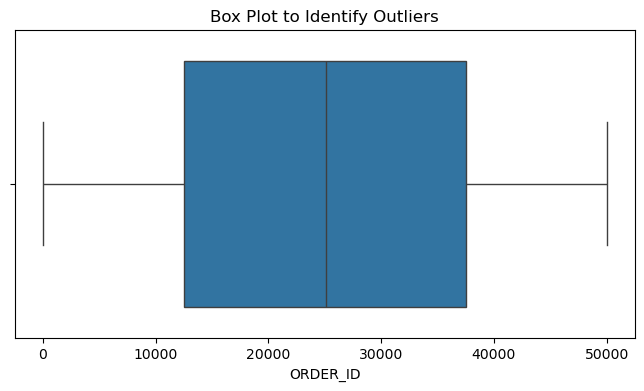

Lower Bound: -24983.5, Upper Bound: 75022.5
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_L

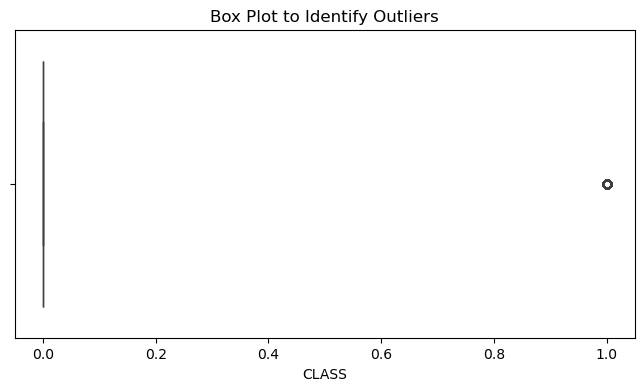

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
9         49933      1        0          0  1978-10-02                 1   
35        49975      1        0          0  1966-01-07                 0   
54        49626      1        1          0  1965-07-08                 0   
69        49656      1        1          0  1985-08-07                 0   
96        49698      1        0          0  1964-12-18                 0   
...         ...    ...      ...        ...         ...               ...   
29954     49214      1        0          0  1985-09-12                 0   
29961     49227      1        1          0  1976-08-05                 1   
29970     49777      1        1          0  1962-01-23                 1   
29985     49804      1        1          0  1965-04-17                 1   
29986     49806      1        1          1  1970-03-31                 1   

       FLAG_NEWSLETTER Z_

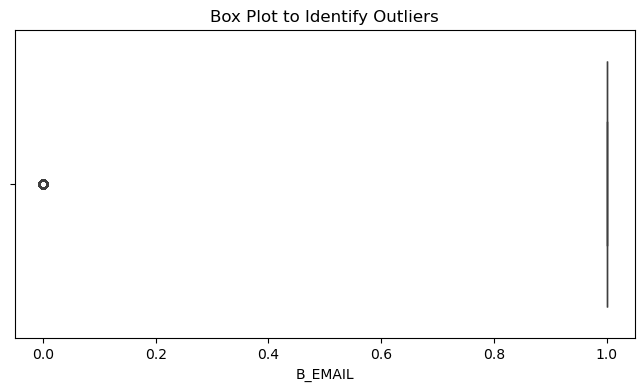

Lower Bound: 1.0, Upper Bound: 1.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
3         49924      0        0          1  1966-08-01                 1   
5         49928      0        0          0  1975-01-20                 0   
7         49930      0        0          0  1985-07-21                 1   
9         49933      1        0          0  1978-10-02                 1   
10        49935      0        0          0         NaT                 0   
...         ...    ...      ...        ...         ...               ...   
29980     49793      0        0          0  1972-09-05                 1   
29982     49795      0        0          0  1986-01-25                 0   
29990     49813      0        0          0         NaT                 0   
29992     49815      0        0          0  1982-09-10                 0   
29993     49816      0        0          1  1966-04-23                 1   

       FLAG_NEWSLETTER Z_

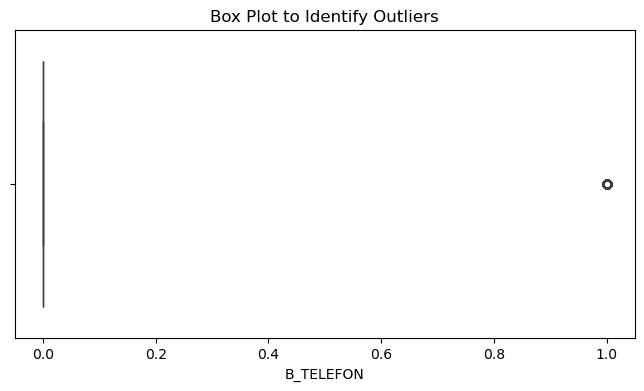

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
1         49919      0        1          1  1970-12-08                 0   
3         49924      0        0          1  1966-08-01                 1   
4         49927      0        1          1  1969-12-21                 1   
25        49956      0        1          1  1975-12-26                 1   
28        49960      0        1          1  1981-10-04                 0   
...         ...    ...      ...        ...         ...               ...   
29959     49225      0        1          1  1965-03-02                 1   
29966     49234      0        1          1  1964-07-16                 1   
29979     49792      0        1          1  1972-09-13                 1   
29986     49806      1        1          1  1970-03-31                 1   
29993     49816      0        0          1  1966-04-23                 1   

       FLAG_NEWSLETTER Z_

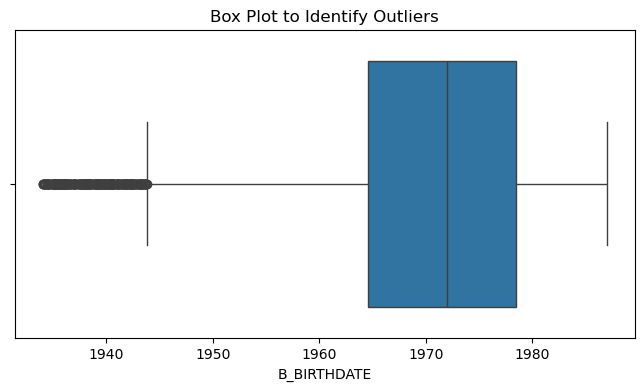

Lower Bound: 1943-11-03 03:00:00, Upper Bound: 1999-03-13 03:00:00
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
73        49660      0        0          1  1935-07-13                 1   
80        49674      0        1          0  1939-03-27                 1   
98        49702      0        1          0  1937-08-06                 0   
133       49766      0        1          0  1940-02-23                 0   
251       49487      1        1          0  1939-01-19                 1   
...         ...    ...      ...        ...         ...               ...   
29500     48398      0        1          1  1935-09-18                 0   
29671     49238      0        1          0  1940-05-24                 0   
29882     49603      0        0          0  1942-07-08                 1   
29924     49157      0        1          0  1940-08-01                 1   
29964     49232      0        1          0  1934-06-28                

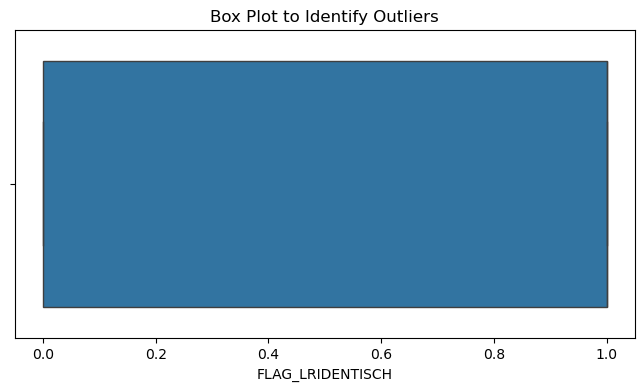

Lower Bound: -1.5, Upper Bound: 2.5
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAI

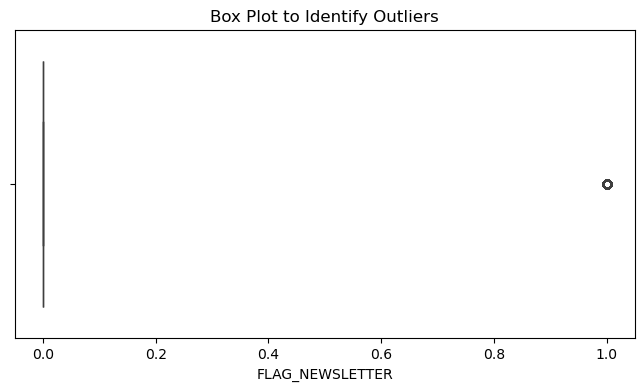

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
0         49917      0        1          0  1973-01-17                 1   
43        49992      0        1          0  1978-01-17                 0   
45        49994      0        1          1  1953-11-22                 1   
48        49998      0        1          1         NaT                 1   
80        49674      0        1          0  1939-03-27                 1   
...         ...    ...      ...        ...         ...               ...   
29916     49144      0        1          0  1978-10-15                 1   
29931     49169      0        1          1  1985-08-19                 1   
29941     49190      0        1          0  1973-07-20                 1   
29967     49769      0        1          0  1973-01-30                 1   
29983     49801      0        1          0  1983-09-06                 1   

       FLAG_NEWSLETTER Z_

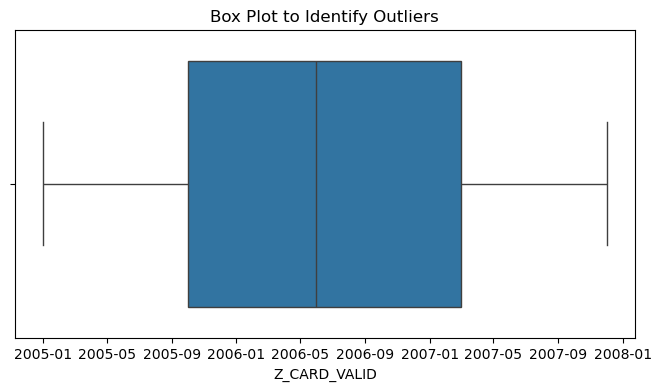

Lower Bound: 2003-08-19 00:00:00, Upper Bound: 2009-04-13 00:00:00
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK

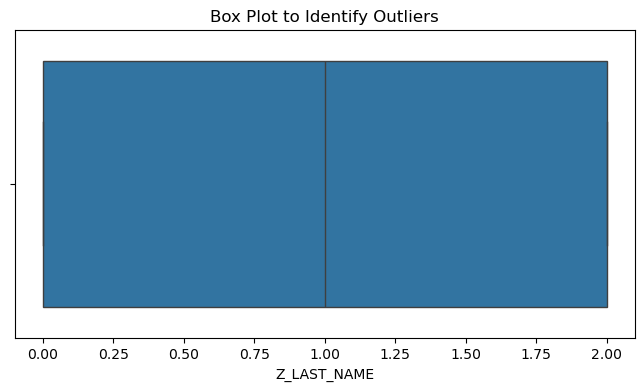

Lower Bound: -3.0, Upper Bound: 5.0
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAI

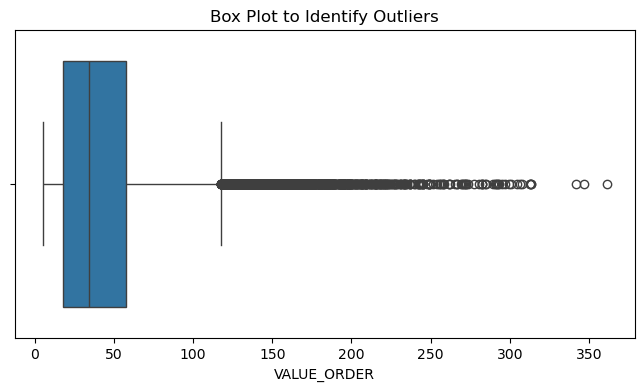

Lower Bound: -41.72500000000001, Upper Bound: 117.515
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
10        49935      0        0          0         NaT                 0   
55        49627      0        1          0  1961-10-31                 0   
83        49678      0        1          0  1966-11-16                 1   
92        49691      0        0          1  1972-03-15                 1   
102       49709      1        0          0  1966-11-02                 0   
...         ...    ...      ...        ...         ...               ...   
29912     49135      0        1          1  1945-08-09                 1   
29914     49139      0        1          0  1978-08-08                 1   
29924     49157      0        1          0  1940-08-01                 1   
29952     49211      0        1          0  1966-05-14                 1   
29965     49233      0        1          0  1962-10-18                 0   

      

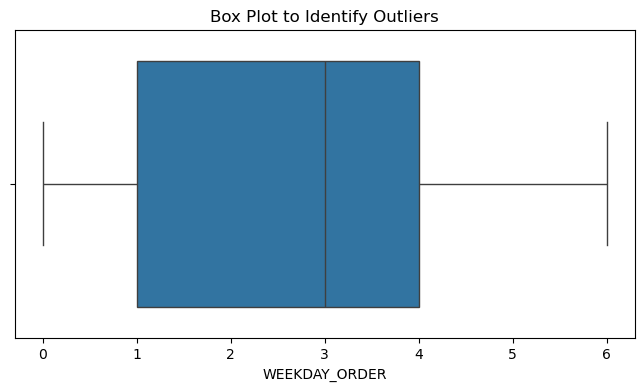

Lower Bound: -3.5, Upper Bound: 8.5
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAI

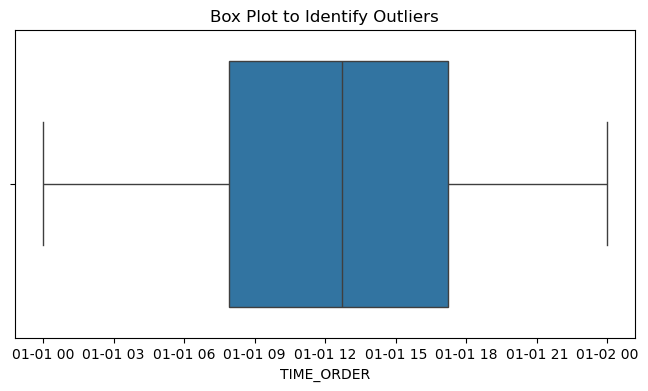

Lower Bound: 1899-12-31 17:56:30, Upper Bound: 1900-01-02 07:12:30
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK

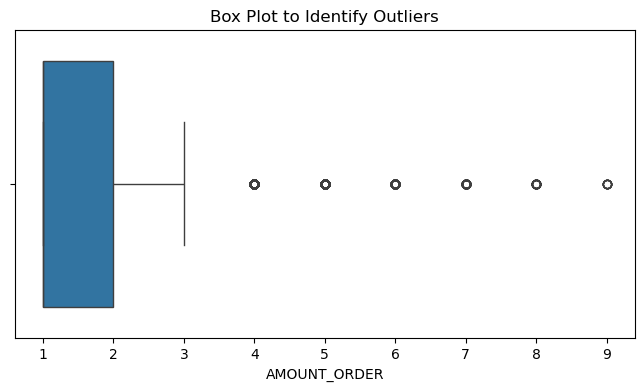

Lower Bound: -0.5, Upper Bound: 3.5
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
10        49935      0        0          0         NaT                 0   
79        49673      0        1          1  1975-06-23                 0   
83        49678      0        1          0  1966-11-16                 1   
107       49716      0        1          0  1984-04-23                 1   
159       49869      1        1          0  1982-06-29                 1   
...         ...    ...      ...        ...         ...               ...   
29924     49157      0        1          0  1940-08-01                 1   
29927     49161      0        1          1  1970-01-19                 1   
29952     49211      0        1          0  1966-05-14                 1   
29965     49233      0        1          0  1962-10-18                 0   
29983     49801      0        1          0  1983-09-06                 1   

       FLAG_NEWSLETTER Z

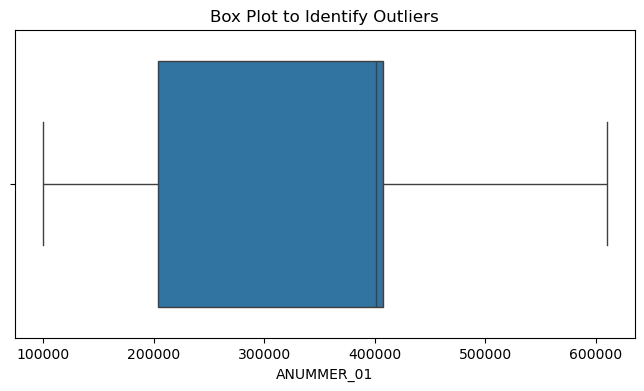

Lower Bound: -101157.0, Upper Bound: 713019.0
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL

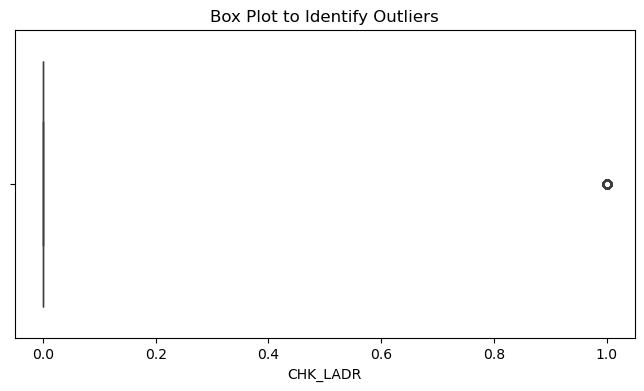

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
16        49942      0        1          0  1974-10-28                 0   
19        49945      0        1          0  1970-04-09                 1   
31        49967      0        1          0  1976-02-06                 1   
54        49626      1        1          0  1965-07-08                 0   
89        49687      0        1          1  1977-08-19                 1   
...         ...    ...      ...        ...         ...               ...   
29814     48944      0        1          0  1979-11-24                 1   
29871     49581      0        1          0  1983-04-15                 1   
29883     49605      0        1          0  1961-12-18                 1   
29895     49102      0        1          1  1968-01-15                 1   
29970     49777      1        1          0  1962-01-23                 1   

       FLAG_NEWSLETTER Z_

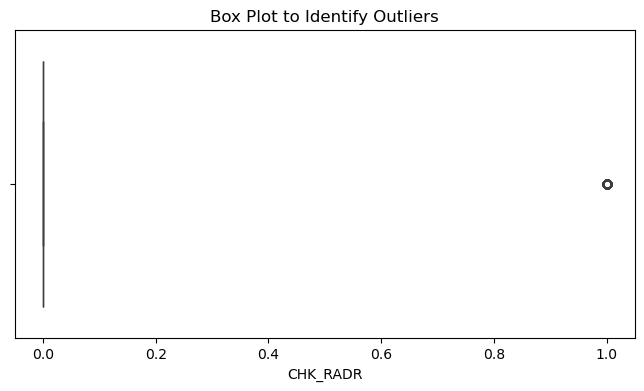

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
190       49388      0        0          1  1962-01-15                 1   
662       45005      1        1          0         NaT                 1   
972       44478      0        1          0  1955-06-15                 1   
1023      44574      1        1          0  1985-01-01                 1   
1138      44265      1        1          0  1971-03-05                 0   
...         ...    ...      ...        ...         ...               ...   
28740     47096      0        1          0  1964-09-12                 1   
28856     47294      1        0          0  1984-09-03                 0   
29219     48467      0        1          0  1972-05-23                 1   
29499     48397      0        1          1  1962-05-28                 1   
29834     49524      0        1          1  1982-09-26                 1   

       FLAG_NEWSLETTER Z_

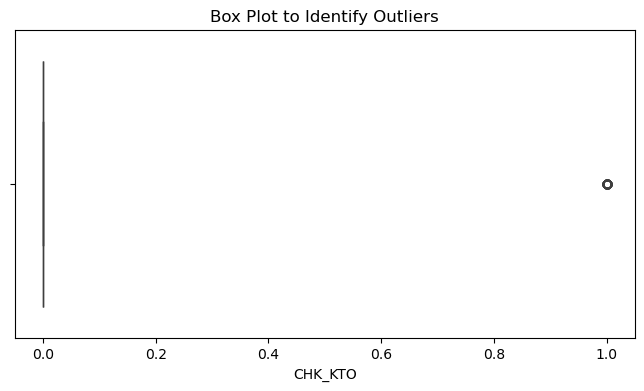

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
554       45352      0        1          0  1971-06-20                 1   
576       44875      0        1          0  1966-04-08                 0   
813       44729      0        1          0  1977-11-17                 1   
1258      43957      0        1          1  1963-07-07                 1   
1779      43224      0        1          0  1979-09-09                 1   
...         ...    ...      ...        ...         ...               ...   
29054     48184      0        1          0  1968-09-22                 1   
29184     47873      0        0          1  1971-02-25                 1   
29292     48066      1        0          0  1971-10-26                 1   
29829     49514      0        1          0  1971-07-10                 0   
29899     49111      0        1          0  1969-02-05                 0   

       FLAG_NEWSLETTER Z_

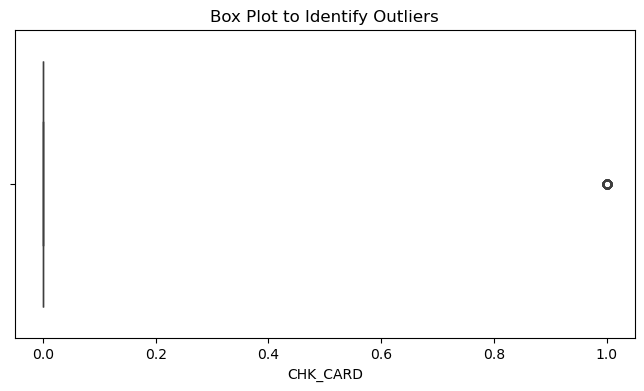

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
3         49924      0        0          1  1966-08-01                 1   
218       49431      0        1          0  1983-03-12                 1   
923       44400      0        1          0  1986-10-28                 1   
1505      43831      0        1          0  1977-12-31                 0   
1845      42806      0        1          0  1966-04-29                 1   
...         ...    ...      ...        ...         ...               ...   
29175     47860      0        1          0  1955-03-09                 1   
29197     47891      1        1          1  1979-10-08                 1   
29201     48435      0        1          0  1971-12-24                 1   
29311     48089      0        1          0  1984-02-01                 1   
29889     49614      0        1          0  1971-07-20                 1   

       FLAG_NEWSLETTER Z_

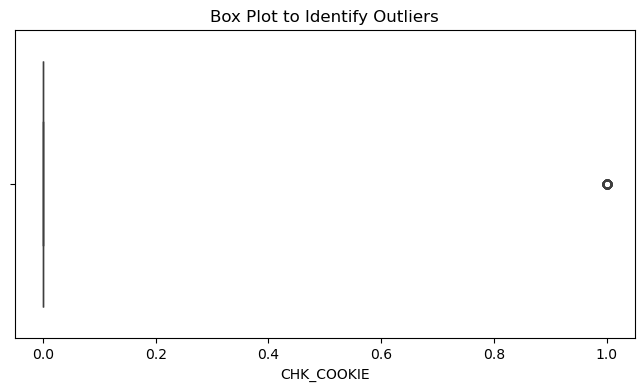

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
217       49430      0        1          1  1960-03-10                 0   
507       45261      0        1          0         NaT                 1   
803       44714      0        0          0  1967-03-26                 1   
891       44859      0        1          0  1977-09-15                 1   
1324      44065      0        0          0  1974-02-27                 1   
...         ...    ...      ...        ...         ...               ...   
27899     45664      0        1          0  1962-05-07                 1   
28025     46410      0        0          1  1963-10-08                 1   
28583     47373      0        1          0  1972-05-08                 0   
29008     47568      1        0          0  1968-12-30                 0   
29453     48314      0        0          0  1985-06-29                 1   

       FLAG_NEWSLETTER Z_

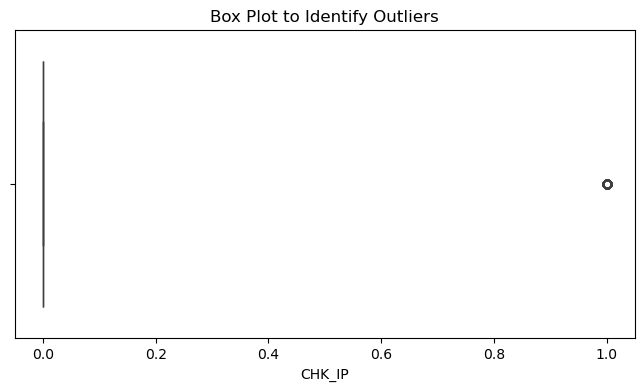

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
369       45547      1        1          0  1952-04-18                 1   
391       45588      0        1          0  1986-04-24                 1   
650       44991      0        1          0  1967-10-07                 0   
883       44847      0        1          0  1969-11-16                 0   
970       44474      0        1          0  1955-03-08                 0   
...         ...    ...      ...        ...         ...               ...   
28646     47474      0        1          0  1953-12-15                 1   
28972     47521      0        1          0  1966-06-06                 1   
29066     48209      0        1          1  1975-09-11                 1   
29117     48290      0        1          0  1982-12-11                 1   
29762     48855      1        1          0  1972-02-05                 1   

       FLAG_NEWSLETTER Z_

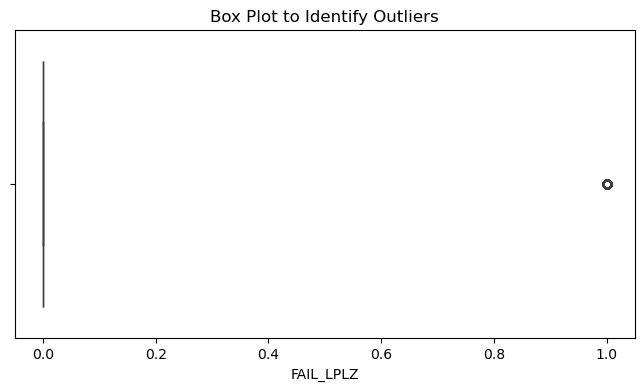

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
276       45660      0        1          0         NaT                 1   
315       45448      0        0          0  1967-01-16                 1   
1311      44043      0        1          0  1976-08-20                 1   
1328      44072      0        1          0  1972-03-19                 1   
1403      43668      0        1          0  1982-07-23                 0   
...         ...    ...      ...        ...         ...               ...   
29269     48560      0        1          0  1976-10-14                 1   
29698     49285      1        1          0  1966-11-26                 0   
29710     49307      0        1          0  1978-07-19                 0   
29824     48962      0        0          0  1971-02-27                 1   
29981     49794      0        1          0         NaT                 1   

       FLAG_NEWSLETTER Z_

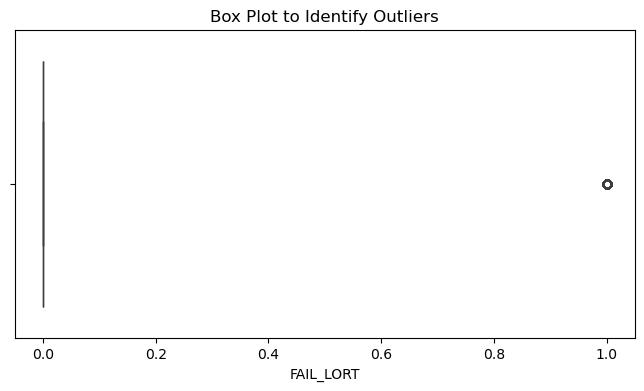

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
33        49973      0        0          0  1986-05-01                 1   
196       49397      0        0          0  1963-06-29                 1   
532       45305      1        0          0  1971-04-09                 1   
546       45330      0        1          1  1974-04-24                 0   
666       45017      0        1          0         NaT                 1   
...         ...    ...      ...        ...         ...               ...   
29132     47787      0        1          0  1976-04-11                 1   
29231     48483      0        1          1  1982-01-10                 0   
29247     48506      0        1          0  1985-11-27                 1   
29642     48656      1        1          0  1955-12-27                 1   
29989     49812      0        1          0  1960-03-29                 1   

       FLAG_NEWSLETTER Z_

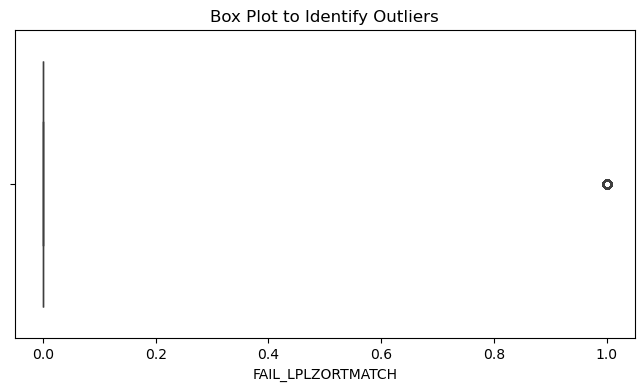

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
34        49974      0        1          0  1983-11-08                 0   
91        49689      0        1          0  1969-07-25                 1   
171       49359      0        0          0  1968-09-04                 1   
451       45173      0        0          1  1982-10-24                 0   
557       45357      0        1          0  1978-10-09                 1   
...         ...    ...      ...        ...         ...               ...   
28966     48035      0        0          0         NaT                 1   
29161     47837      0        1          0  1965-02-09                 1   
29273     48566      0        1          1  1981-08-11                 0   
29326     48111      0        1          0         NaT                 1   
29839     49532      0        1          0  1950-09-23                 0   

       FLAG_NEWSLETTER Z_

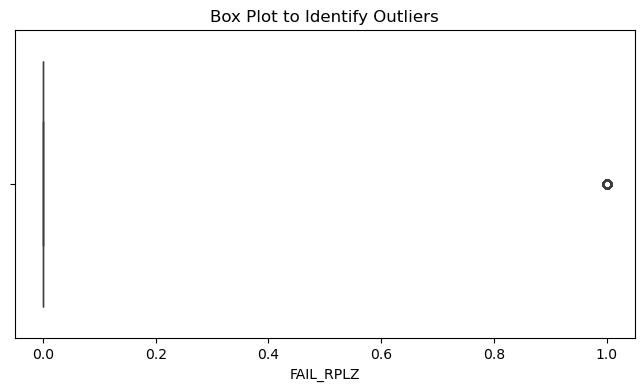

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
1         49919      0        1          1  1970-12-08                 0   
38        49985      0        1          1  1983-05-01                 1   
63        49643      0        0          0  1970-02-26                 0   
105       49714      0        1          0  1967-06-16                 1   
229       49451      0        1          0  1976-06-25                 1   
...         ...    ...      ...        ...         ...               ...   
29705     49300      0        1          1         NaT                 1   
29754     48845      0        0          1  1981-02-25                 1   
29778     48885      1        1          0  1970-08-15                 1   
29839     49532      0        1          0  1950-09-23                 0   
29977     49789      0        1          0         NaT                 1   

       FLAG_NEWSLETTER Z_

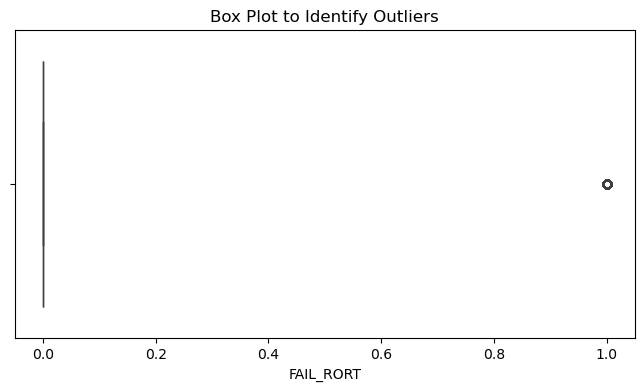

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
60        49637      0        1          0         NaT                 1   
244       49476      1        1          1  1962-03-17                 0   
263       49895      0        0          0  1975-09-08                 1   
278       45662      0        1          0  1979-03-29                 1   
328       45466      0        0          0  1966-03-01                 1   
...         ...    ...      ...        ...         ...               ...   
29449     48310      0        0          0  1975-10-12                 0   
29565     49039      1        1          0         NaT                 1   
29696     49280      1        1          0         NaT                 0   
29783     48893      0        0          0  1956-03-04                 1   
29933     49178      0        1          0  1977-11-20                 1   

       FLAG_NEWSLETTER Z_

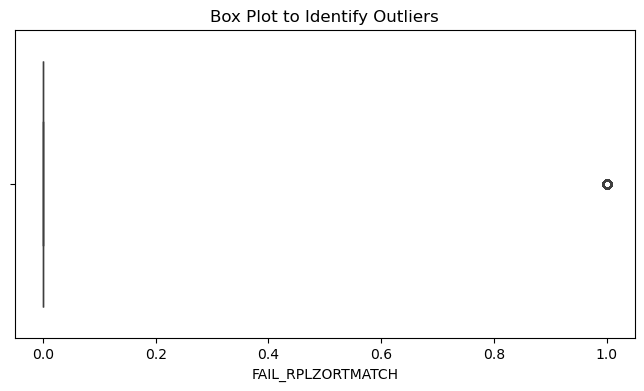

Lower Bound: 0.0, Upper Bound: 0.0
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
209       49420      0        1          0         NaT                 0   
225       49443      0        1          0  1967-01-03                 1   
256       49498      0        0          0  1975-05-23                 1   
283       45398      0        0          0  1971-07-02                 0   
308       45431      0        1          0  1984-07-20                 1   
...         ...    ...      ...        ...         ...               ...   
29697     49283      0        1          0  1959-08-03                 1   
29800     48914      0        1          0  1981-06-17                 1   
29936     49181      0        1          0  1968-03-12                 1   
29958     49222      0        1          0  1973-05-22                 1   
29977     49789      0        1          0         NaT                 1   

       FLAG_NEWSLETTER Z_

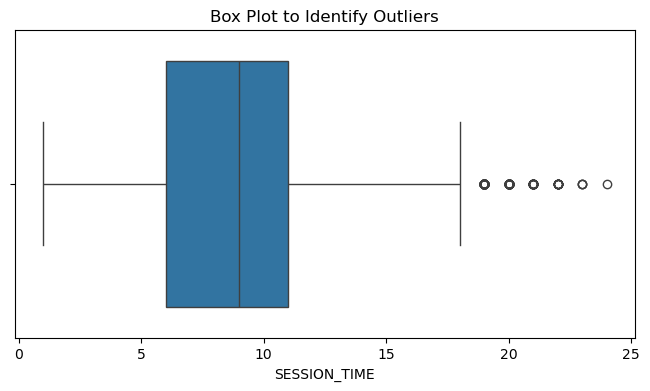

Lower Bound: -1.5, Upper Bound: 18.5
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
144       49843      0        0          1  1963-08-12                 1   
260       49888      0        1          0  1981-06-10                 1   
497       45248      0        0          0  1970-01-26                 0   
782       44685      0        1          1  1986-09-03                 1   
848       44798      0        1          0  1964-06-19                 1   
...         ...    ...      ...        ...         ...               ...   
29359     48165      0        1          0  1963-02-02                 0   
29377     48723      0        0          0  1961-01-07                 1   
29566     49042      0        1          0  1962-11-02                 1   
29807     48932      0        1          0  1963-09-16                 1   
29910     49129      0        0          0  1969-07-19                 1   

       FLAG_NEWSLETTER 

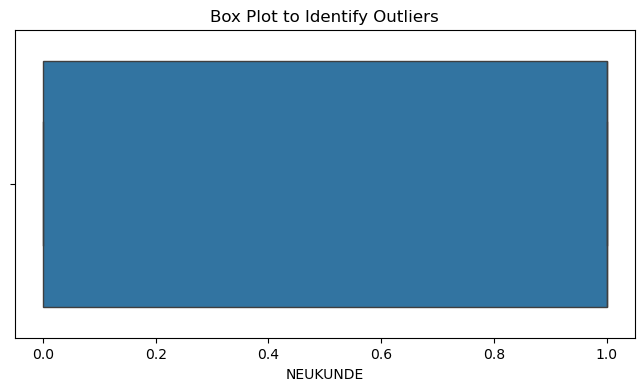

Lower Bound: -1.5, Upper Bound: 2.5
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAI

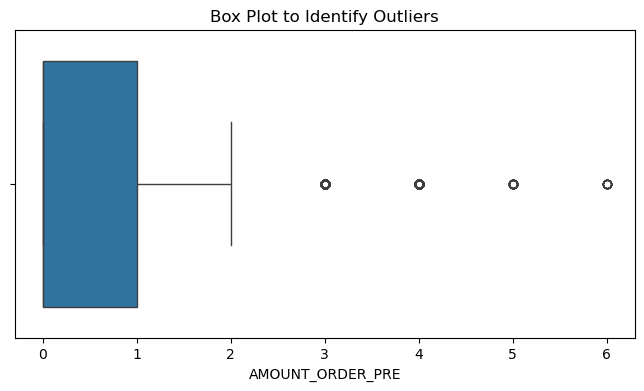

Lower Bound: -1.5, Upper Bound: 2.5
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
3         49924      0        0          1  1966-08-01                 1   
61        49640      0        0          0         NaT                 1   
87        49684      0        1          1  1971-03-02                 1   
114       49730      0        1          0  1968-05-02                 0   
125       49749      0        1          1         NaT                 1   
...         ...    ...      ...        ...         ...               ...   
29719     49321      0        1          0  1979-01-22                 1   
29793     48906      0        1          0  1963-06-11                 0   
29877     49593      0        1          0  1970-06-29                 1   
29878     49596      0        1          0  1983-11-30                 1   
29897     49104      0        0          0         NaT                 1   

       FLAG_NEWSLETTER Z

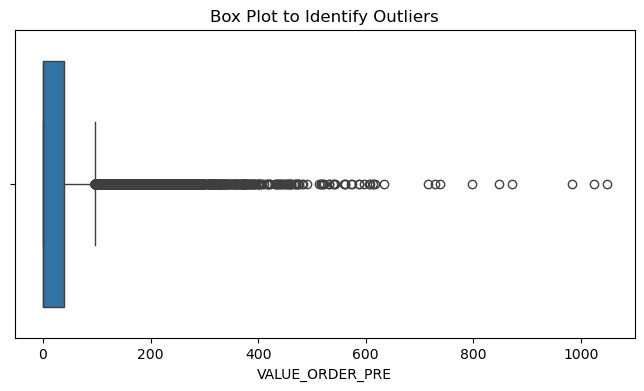

Lower Bound: -57.705, Upper Bound: 96.175
Outliers using IQR method:
       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
22        49949      0        1          0  1974-01-27                 1   
29        49962      0        1          0  1944-05-10                 1   
50        50000      0        0          0  1964-06-26                 1   
74        49661      0        1          0  1978-01-08                 1   
81        49675      0        1          0         NaT                 1   
...         ...    ...      ...        ...         ...               ...   
29955     49216      0        1          0  1978-02-12                 1   
29966     49234      0        1          1  1964-07-16                 1   
29968     49775      0        1          0  1960-06-22                 1   
29982     49795      0        0          0  1986-01-25                 0   
29991     49814      0        1          0  1973-08-20                 0   

       FLAG_NEWSLE

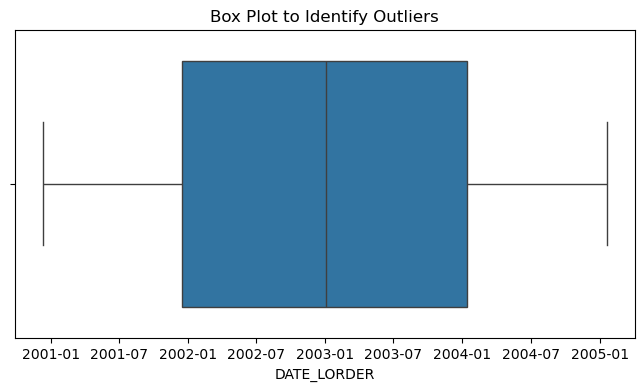

Lower Bound: 1998-11-05 00:00:00, Upper Bound: 2007-02-23 00:00:00
Outliers using IQR method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK_COOKIE, CHK_IP, FAIL_LPLZ, FAIL_LORT, FAIL_LPLZORTMATCH, FAIL_RPLZ, FAIL_RORT, FAIL_RPLZORTMATCH, SESSION_TIME, NEUKUNDE, AMOUNT_ORDER_PRE, VALUE_ORDER_PRE, DATE_LORDER, MAHN_HOECHST_0, MAHN_HOECHST_1, MAHN_HOECHST_2, MAHN_HOECHST_3, MAHN_AKT_0, MAHN_AKT_1, MAHN_AKT_2, MAHN_AKT_3, new_check, new_credit_card, new_debit_card, new_debit_note, Value]
Index: []

[0 rows x 44 columns]
Outliers using Z-score method:
Empty DataFrame
Columns: [ORDER_ID, CLASS, B_EMAIL, B_TELEFON, B_BIRTHDATE, FLAG_LRIDENTISCH, FLAG_NEWSLETTER, Z_CARD_VALID, Z_LAST_NAME, VALUE_ORDER, WEEKDAY_ORDER, TIME_ORDER, AMOUNT_ORDER, ANUMMER_01, CHK_LADR, CHK_RADR, CHK_KTO, CHK_CARD, CHK

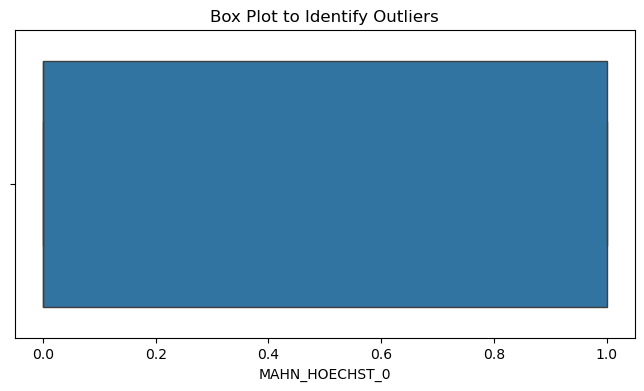

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_combined is already defined with the "AMOUNT_ORDER" column
# For example, you might have df_combined defined like this:
# df_combined = pd.DataFrame({'AMOUNT_ORDER': np.random.normal(loc=100, scale=20, size=200)})
for numerical_col in df_combined.columns:
# 1. Identify Outliers Using Box Plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_combined[col])
    plt.title('Box Plot to Identify Outliers')
    plt.show()

    # 2. Identify Outliers Using IQR Method
    Q1 = df_combined[col].quantile(0.25)
    Q3 = df_combined[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Outliers based on IQR
    outliers_iqr = df_combined[(df_combined[col] < lower_bound) | (df_combined[col] > upper_bound)]
    print("Outliers using IQR method:")
    print(outliers_iqr)

    # 3. Identify Outliers Using Z-Score
    z_scores = (df_combined[col] - df_combined[col].mean()) / df_combined[col].std()
    outliers_z = df_combined[np.abs(z_scores) > 3]
    print("Outliers using Z-score method:")
    print(outliers_z)

    # 4. Handle Outliers - Remove Them
    df_cleaned = df_combined[(df_combined[col] >= lower_bound) & (df_combined[col] <= upper_bound)]
    print("\nDataFrame after removing outliers:")
    print(df_cleaned)

    # Optional: Handle Outliers by Capping
    df_combined['Value'] = np.where(df_combined[col] > upper_bound, upper_bound, df_combined[col])
    df_combined['Value'] = np.where(df_combined[col] < lower_bound, lower_bound, df_combined[col])

    print("\nDataFrame after capping outliers:")
    print(df_combined)
    outliers = df_combined[(df_combined[col] < lower_bound) | (df_combined[col] > upper_bound)]
    print("\nOutliers:")
    print(outliers)


In [475]:
print(df_cleaned)

       ORDER_ID  CLASS  B_EMAIL  B_TELEFON B_BIRTHDATE  FLAG_LRIDENTISCH  \
3         49924      0        0          1  1966-08-01                 1   
5         49928      0        0          0  1975-01-20                 0   
6         49929      0        1          0  1978-02-03                 1   
8         49931      0        1          0  1953-05-21                 0   
10        49935      0        0          0         NaT                 0   
...         ...    ...      ...        ...         ...               ...   
29994     49817      0        1          0  1985-09-22                 1   
29995     49821      0        1          0  1981-03-03                 1   
29996     49824      0        1          0  1972-02-21                 0   
29998     49828      0        1          0  1980-12-04                 0   
29999     49829      0        1          0  1958-03-15                 0   

       FLAG_NEWSLETTER Z_CARD_VALID  Z_LAST_NAME  VALUE_ORDER  ...  \
3                

In [476]:
df_cleaned

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,MAHN_HOECHST_3,MAHN_AKT_0,MAHN_AKT_1,MAHN_AKT_2,MAHN_AKT_3,new_check,new_credit_card,new_debit_card,new_debit_note,Value
3,49924,0,0,1,1966-08-01,1,0,2007-01-01,0,54.50,...,False,True,False,False,False,True,False,False,False,75.72
5,49928,0,0,0,1975-01-20,0,0,2007-02-01,2,22.95,...,False,True,False,False,False,False,True,False,False,6.95
6,49929,0,1,0,1978-02-03,1,0,2007-11-01,0,9.80,...,False,True,False,False,False,True,False,False,False,10.44
8,49931,0,1,0,1953-05-21,0,0,2007-09-01,2,9.99,...,False,False,True,False,False,False,True,False,False,6.10
10,49935,0,0,0,NaT,0,0,2007-01-01,2,168.19,...,False,True,False,False,False,False,True,False,False,82.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,49817,0,1,0,1985-09-22,1,0,2007-07-01,0,62.00,...,False,True,False,False,False,True,False,False,False,20.89
29995,49821,0,1,0,1981-03-03,1,0,2005-06-01,0,18.20,...,True,True,False,False,False,True,False,False,False,40.83
29996,49824,0,1,0,1972-02-21,0,0,2005-05-01,2,12.60,...,False,True,False,False,False,False,True,False,False,52.84
29998,49828,0,1,0,1980-12-04,0,0,2005-04-01,2,5.20,...,False,True,False,False,False,False,True,False,False,42.92


In [477]:
df_combined.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_CARD_VALID,Z_LAST_NAME,VALUE_ORDER,...,MAHN_HOECHST_3,MAHN_AKT_0,MAHN_AKT_1,MAHN_AKT_2,MAHN_AKT_3,new_check,new_credit_card,new_debit_card,new_debit_note,Value
0,49917,0,1,0,1973-01-17,1,1,2006-05-01,0,17.80,...,False,False,False,False,False,True,False,False,False,None
1,49919,0,1,1,1970-12-08,0,0,2007-12-01,2,18.20,...,False,False,False,False,False,False,True,False,False,None
2,49923,0,1,0,1972-04-03,1,0,2007-12-01,0,10.80,...,False,False,False,False,False,True,False,False,False,None
3,49924,0,0,1,1966-08-01,1,0,2007-01-01,0,54.50,...,False,True,False,False,False,True,False,False,False,1021161600000000000
4,49927,0,1,1,1969-12-21,1,0,2006-12-01,2,19.99,...,False,False,False,False,False,False,True,False,False,None
